In [141]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import hsv_to_rgb
import seaborn as sns

DOTS = 100

- ВЫ

-           ЛЮБИТЕ
    
-                   РОЗЫ?

И я) 

### Task №1

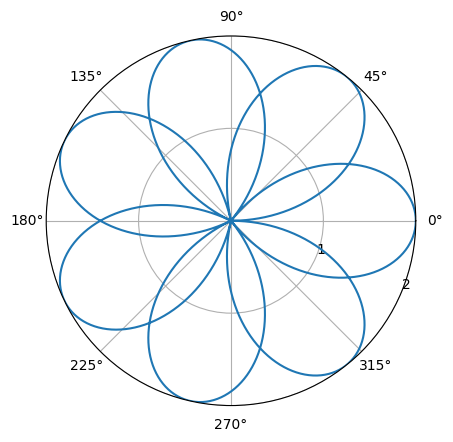

In [142]:
def f(z:complex):
    return np.sinh((z*1j)/4)

#Finite approximation of boundary

phi = np.arange(0,4*np.pi,1/DOTS)
r = 2*abs(np.cos((7/4)*phi))

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(phi, r)
ax.set_rmax(2)
ax.set_rticks([1, 2]) 
ax.set_rlabel_position(-22.5) 
ax.grid(True)
plt.show()

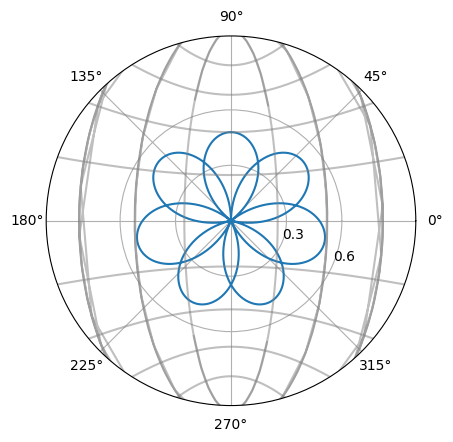

In [143]:
z = r*np.cos(phi) + r*np.sin(phi)*1j
w = f(z)
theta = np.arctan2(w.imag,w.real)
rho = abs(w)

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, rho)
ax.set_rticks([0.3, 0.6]) 
ax.set_rlabel_position(-22.5) 
ax.grid(True)

#How to transform coordinate lines
# y = 1 => r = 1/sin(phi)
# and so on for 1 x and 1 y

omegax = np.arange(-np.pi/2+0.1, np.pi/2-0.1, 1/DOTS)
omegay = np.arange(0.1, np.pi-0.1, 1/DOTS)
for i in range(5):
    rxp = i/np.cos(omegax)
    rxm = -i/np.cos(omegax)
    zxp = rxp*np.cos(omegax) + rxp*np.sin(omegax)*1j
    zxm = rxm*np.cos(omegax) + rxm*np.sin(omegax)*1j

    wxp = f(zxp)
    wxm = f(zxm)

    psixp = np.arctan2(wxp.imag,wxp.real)
    rhoxp = abs(wxp)
    psixm = np.arctan2(wxm.imag,wxm.real)
    rhoxm = abs(wxm)


    ryp = i/np.sin(omegay)
    rym = -i/np.sin(omegay)
    zyp = ryp*np.cos(omegay) + ryp*np.sin(omegay)*1j
    zym = rym*np.cos(omegay) + rym*np.sin(omegay)*1j

    wyp = f(zyp)
    wym = f(zym)

    psiyp = np.arctan2(wyp.imag,wyp.real)
    rhoyp = abs(wyp)
    psiym = np.arctan2(wym.imag,wym.real)
    rhoym = abs(wym)


    ax.plot(psixp, rhoxp, alpha=0.5, color='grey')
    ax.plot(psixm, rhoxm, alpha=0.5, color='grey')
    ax.plot(psiyp, rhoyp, alpha=0.5, color='grey')
    ax.plot(psiym, rhoym, alpha=0.5, color='grey')

ax.set_rmax(1)
plt.show()

При моем методе счета точек для построения координатных прямых происходит беда, если их сделать много, близость синуса/косинуса аргумента к нулю делает беду (ломанные)

### Task №2

In [234]:
def f(z):
    return np.arcsin(1j*z/2)

def Hcomplex(z):# computes the hue corresponding to the complex number z
    H = np.angle(z) / (2*np.pi) + 1
    return np.mod(H, 1)

DOTS = 65

In [154]:
# rho = np.arange(0, 3, 1/DOTS)
# phi = np.arange(0,2*np.pi, 1/DOTS)
# radius_matrix, theta_matrix = np.meshgrid(r,theta)
# x = radius_matrix * np.cos(theta_matrix)
# y = radius_matrix * np.sin(theta_matrix)
# z = x + 1j*y
# for i in range(1257):
#     if 1.2*abs(np.cos((7/3)*np.arctan2(z[i].imag,z[i].real))) <= abs(z) and abs(z) <= 0.5*abs(np.cos((4/5)*np.arctan2(z[i].imag,z[i].real))):
#         pass

# s = np.array([np.array(zi) for zi in z])
# z = s

# w = z
# H = Hcomplex(w)
# V = abs(w)
# S = 0.8*np.ones(H.shape)
# HSV = np.dstack((H, S, V))
# RGB = hsv_to_rgb(HSV)
# plt.imshow(RGB, origin="lower", extent=[-3, 3, -3, 3])

In [327]:
x = np.arange(0, 0.7, 1/DOTS)
y = np.arange(0, 0.7, 1/DOTS)
df = pd.DataFrame(columns=['x', 'y', 'z', 'rose'])
for x1 in x:
    for y1 in y:
        if 1.2*abs(np.cos((7/3)*np.arctan2(y1,x1))) <= (x1)**2 + (y1)**2 and (x1)**2 + (y1)**2 <= 0.5*abs(np.cos((4/5)*np.arctan2(y1,x1))):
            df.loc[len(df)] = [x1, y1, x1 + 1j*y1, np.arctan2(y1,x1)*(1-2**(-((x1)**2 + (y1)**2)))]
        else:
            df.loc[len(df)] = [x1, y1, x1 + 1j*y1, 0]
df = df.astype({'x':np.float64, 'y':np.float64, 'rose':np.float64})


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/dtypes/astype.py:138: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


In [328]:
df1 = df.copy()

df2 = df.copy()
df2['x'] = -df2['x']
df2['z'] = df2['x'] + 1j*df2['y']

df3 = df.copy()
df3['x'] = -df3['x']
df3['y'] = -df3['y']
df3['z'] = -df3['z']

df4 = df.copy()
df4['y'] = -df4['y']
df4['z'] = df4['x'] + 1j*df4['y']

df = pd.concat([df1,df2,df3,df4], ignore_index=True)

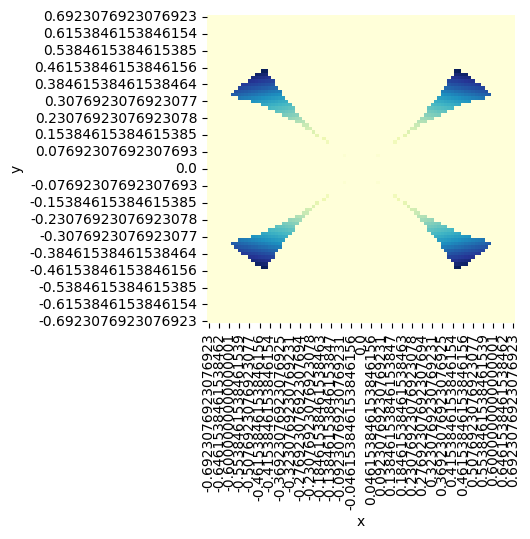

In [329]:
pivot = pd.pivot_table(df,index='y',columns='x', values='rose')
pivot = pivot.sort_index(ascending=False)
fig, axes = plt.subplots(figsize=(7, 4))
sns.heatmap(data=pivot, square=True,cmap="YlGnBu", ax=axes, cbar=False)
plt.show()

In [330]:
size = int(df.shape[0]**0.5)

image = df.copy()
for i in range(len(image['rose'])):
    image.loc[i, 'z'] = f(df.loc[i, 'z'])
    image.loc[i, 'x'] = round(image.loc[i, 'z'].real, 2)
    image.loc[i, 'y'] = round(image.loc[i, 'z'].imag, 2)

In [331]:
image

,x,y,z,rose
0,0.00,0.00,0.000000+0.000000j,0.0
1,-0.01,0.00,-0.007692+0.000000j,0.0
2,-0.02,0.00,-0.015385+0.000000j,0.0
3,-0.02,0.00,-0.023079+0.000000j,0.0
4,-0.03,0.00,-0.030774+0.000000j,0.0
...,...,...,...,...
8459,0.30,0.35,0.301035+0.354953j,0.0
8460,0.31,0.36,0.308529+0.355757j,0.0
8461,0.32,0.36,0.316034+0.356585j,0.0
8462,0.32,0.36,0.323550+0.357438j,0.0


In [332]:
final = image.to_numpy()
final

array([[ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [-0.01      +0.j        ,  0.        +0.j        ,
        -0.00769238+0.j        ,  0.        +0.j        ],
       [-0.02      +0.j        ,  0.        +0.j        ,
        -0.01538522+0.j        ,  0.        +0.j        ],
       ...,
       [ 0.32      +0.j        ,  0.36      +0.j        ,
         0.316034  +0.35658517j,  0.        +0.j        ],
       [ 0.32      +0.j        ,  0.36      +0.j        ,
         0.32355008+0.35743786j,  0.        +0.j        ],
       [ 0.33      +0.j        ,  0.36      +0.j        ,
         0.33107757+0.35831537j,  0.        +0.j        ]])

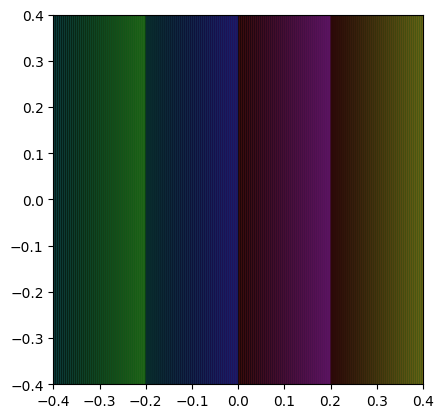

In [333]:
w = final[:,2]
H = Hcomplex(w)
V = abs(w)
S = 0.8*np.ones(H.shape)
HSV = np.dstack((H, S, V))
RGB = hsv_to_rgb(HSV)
plt.imshow(RGB, origin="lower", extent=[-0.4, 0.4, -0.4, 0.4])

Не знаю, че это

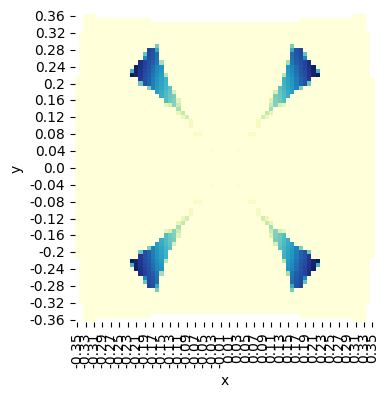

In [334]:
pivot = pd.pivot_table(image,index='y',columns='x', values='rose')
pivot = pivot.sort_index(ascending=False)
fig, axes = plt.subplots(figsize=(7, 4))
sns.heatmap(pivot, square=True,cmap="YlGnBu", ax=axes, cbar=False)
plt.show()

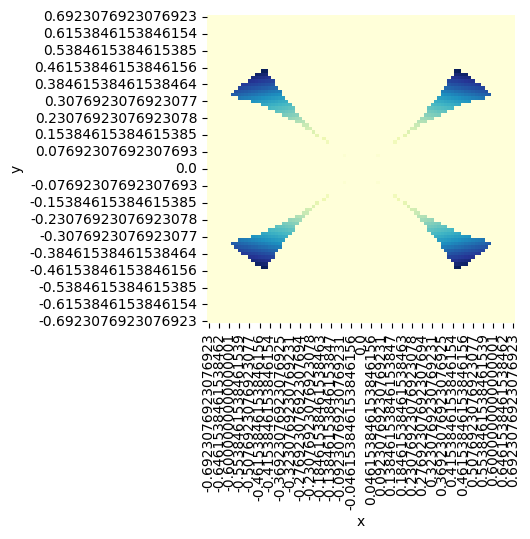

In [335]:
pivot = pd.pivot_table(df,index='y',columns='x', values='rose')
pivot = pivot.sort_index(ascending=False)
fig, axes = plt.subplots(figsize=(7, 4))
sns.heatmap(data=pivot, square=True,cmap="YlGnBu", ax=axes, cbar=False)
plt.show()

Последнее фото просто, чтобы не мотать туда сюда

Интересная вещь, на границе образа появляются как темные, так и светлые куски) 